In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=5
paper='2008.08998'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let me systematically analyze this Hartree-Fock Hamiltonian to create the appropriate Python implementation.

### QUESTION 1: Identifying Dimensions and Basis Order

Looking at the Hamiltonian equation:

$H_0 = -\sum_{s}\sum_{\bm{p},\bm{q}}\sum_{R_\bm{n}} t_{s}(\bm{n}) e^{-i (\bm{p}+\bm{q}) \cdot R_\bm{n}} c_{\bm{p}+\bm{q},s}^\dagger c_{\bm{p},s}$

$H_{\text{Hartree}} = \frac{1}{\mathcal{N}}\sum_{s,s'} \sum_{\bm{p},\bm{q}} U(\bm{q}_\alpha-\bm{q}_\delta)\delta_{\bm{q}_\alpha+\bm{q}_\beta,\bm{q}_\gamma+\bm{q}_\delta} \langle c_{\bm{q}_\alpha,s}^\dagger(\bm{p}_\alpha) c_{\bm{q}_\delta,s}(\bm{p}_\alpha) \rangle c_{\bm{q}_\beta,s'}^\dagger(\bm{p}_\beta) c_{\bm{q}_\gamma,s'}(\bm{p}_\beta)$

$H_{\text{Fock}} = -\frac{1}{\mathcal{N}}\sum_{s,s'} \sum_{\bm{p},\bm{q}} U(\bm{p}_\alpha+\bm{q}_\alpha-\bm{p}_\beta-\bm{q}_\delta)\delta_{\bm{q}_\alpha+\bm{q}_\beta,\bm{q}_\gamma+\bm{q}_\delta} \langle c_{\bm{q}_\alpha,s}^\dagger(\bm{p}_\alpha) c_{\bm{

In [7]:
print(generated_code['thinking'])

Let me systematically analyze this Hartree-Fock Hamiltonian to create the appropriate Python implementation.

### QUESTION 1: Identifying Dimensions and Basis Order

Looking at the Hamiltonian equation:

$H_0 = -\sum_{s}\sum_{\bm{p},\bm{q}}\sum_{R_\bm{n}} t_{s}(\bm{n}) e^{-i (\bm{p}+\bm{q}) \cdot R_\bm{n}} c_{\bm{p}+\bm{q},s}^\dagger c_{\bm{p},s}$

$H_{\text{Hartree}} = \frac{1}{\mathcal{N}}\sum_{s,s'} \sum_{\bm{p},\bm{q}} U(\bm{q}_\alpha-\bm{q}_\delta)\delta_{\bm{q}_\alpha+\bm{q}_\beta,\bm{q}_\gamma+\bm{q}_\delta} \langle c_{\bm{q}_\alpha,s}^\dagger(\bm{p}_\alpha) c_{\bm{q}_\delta,s}(\bm{p}_\alpha) \rangle c_{\bm{q}_\beta,s'}^\dagger(\bm{p}_\beta) c_{\bm{q}_\gamma,s'}(\bm{p}_\beta)$

$H_{\text{Fock}} = -\frac{1}{\mathcal{N}}\sum_{s,s'} \sum_{\bm{p},\bm{q}} U(\bm{p}_\alpha+\bm{q}_\alpha-\bm{p}_\beta-\bm{q}_\delta)\delta_{\bm{q}_\alpha+\bm{q}_\beta,\bm{q}_\gamma+\bm{q}_\delta} \langle c_{\bm{q}_\alpha,s}^\dagger(\bm{p}_\alpha) c_{\bm{q}_\gamma,s'}(\bm{p}_\alpha) \rangle c_{\bm{q}_\beta,

In [8]:
print(generated_code['text'])

# 1) Dimension and Basis Order

Looking at the Hamiltonian equation, I need to identify the flavors from the creation and annihilation operators.

The operators are of the form `c_{p+q,s}^†` and `c_{p,s}`, which shows:
- `s` represents the spin index
- `q` represents reciprocal lattice vectors (specifically Γ, K, and K' points)

Tuple of Flavors (D) = (2, 3)
Basis Order:
0: spin. Order: spin up (0), spin down (1)
1: reciprocal lattice vector. Order: Γ (0), K (1), K' (2)

# 2) Identifying Interacting Terms

EXP-VAL DEPENDENT TERMS:
- `\langle c_{\bm{q}_\alpha,s}^\dagger(\bm{p}_\alpha) c_{\bm{q}_\delta,s}(\bm{p}_\alpha) \rangle`: Mean electron density with same spin but potentially different q-vectors (for Hartree term)
- `\langle c_{\bm{q}_\alpha,s}^\dagger(\bm{p}_\alpha) c_{\bm{q}_\gamma,s'}(\bm{p}_\alpha) \rangle`: Exchange correlation between potentially different spins and q-vectors (for Fock term)

TERMS:
- $H_0 = -\sum_{s}\sum_{\bm{p},\bm{q}}\sum_{R_\bm{n}} t_{s}(\bm{n}) e^{-i (\b

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a triangular lattice with spin and reciprocal lattice vectors
    corresponding to high-symmetry points in the folded Brillouin zone.
    
    Args:
        N_shell (int): Number of shells in k-space for discretization.
        parameters (dict): Dictionary of model parameters.
        filling_factor (float): Filling factor (default: 0.5).
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={}, filling_factor: float=0.5):
        self.lattice = 'triangular'
        self.D = (2, 3)  # (|spin|, |q|)
        self.basis_order = {'0': 'spin', '1': 'reciprocal_lattice_vector'}
        # Spin: 0 = up, 1 = down
        # Reciprocal lattice vector: 0 = Γ, 1 = K, 2 = K'
        
        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = parameters.get('T', 0.0)  # temperature, default to 0
        self.a = parameters

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2008_08998_5.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

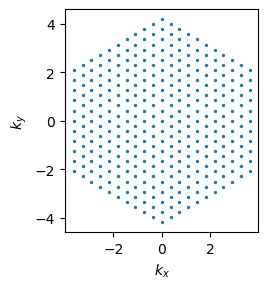

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

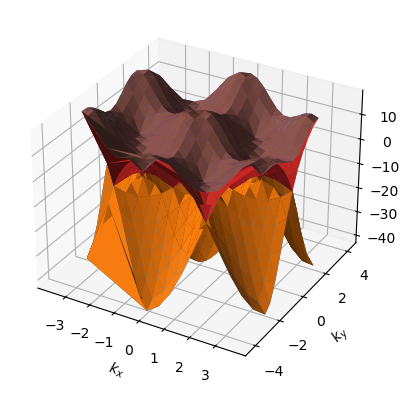

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

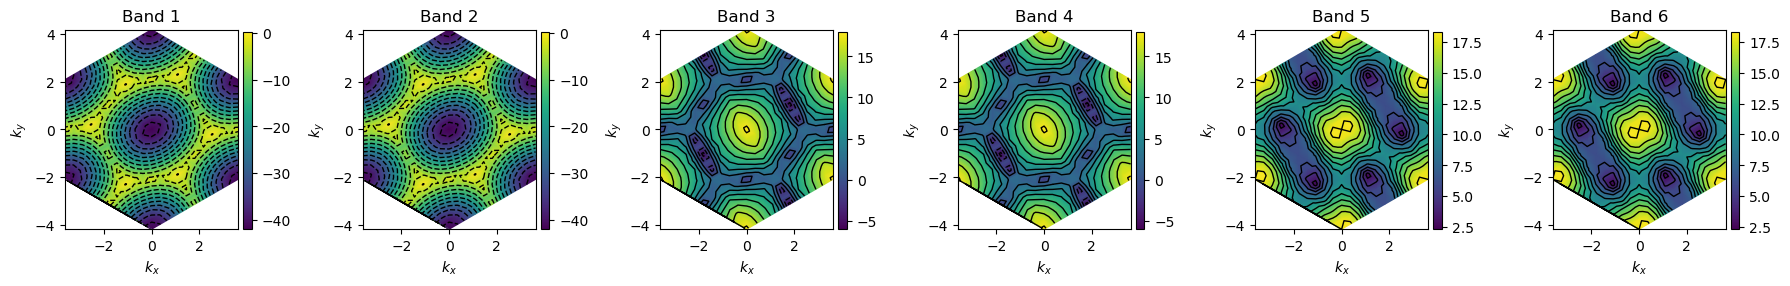

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'epsilon_r':1e5},filling_factor=1/2)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [25]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 1


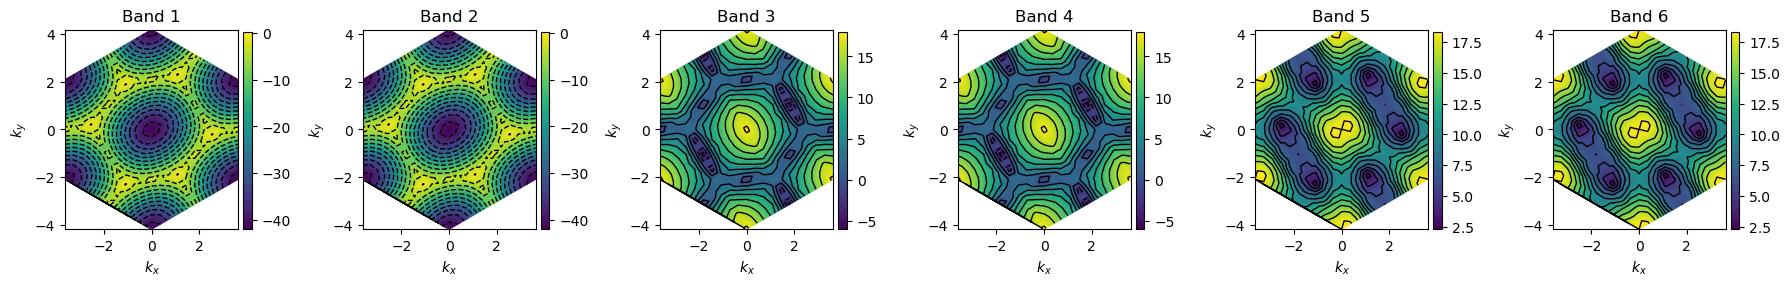

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'epsilon_r':1e-2},filling_factor=1/2)


In [28]:
h_nonint=ham_int.generate_non_interacting()
for q in range(3):
    h_nonint[0,q,0,q,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

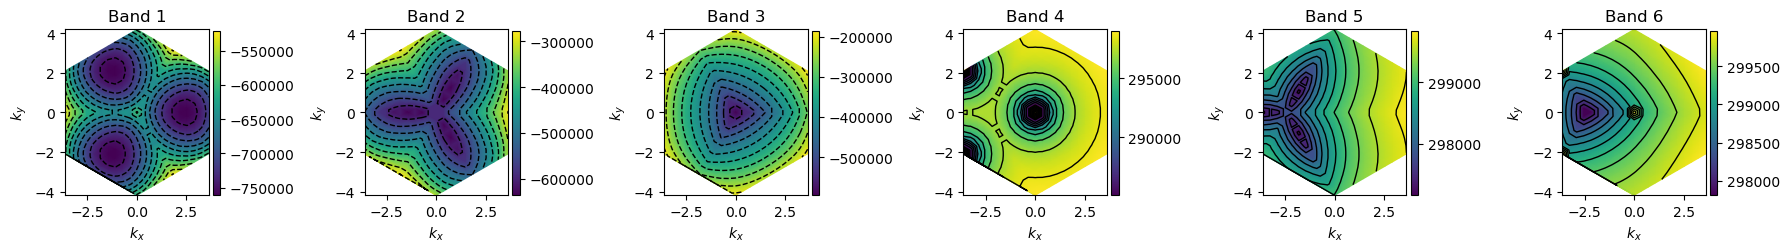

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is -317214.41
U/T is 31604.91
mean_U is 65912.07


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image in relation to the condensed matter physics problem involving the Hartree-Fock calculation.

First, looking at the image:
- It shows a hexagonal arrangement of points in momentum (k) space
- The x-axis is labeled as k_x and ranges approximately from -3 to 3
- The y-axis is labeled as k_y and ranges approximately from -4 to 4
- The points form a hexagonal lattice in the k-space

Now I need to determine if this is the correct representation of the first Brillouin zone for the problem described.

From the problem description:
- We have a triangular lattice in real space
- The problem mentions a "folded Brillouin zone" corresponding to a √3 × √3 superlattice
- The BZ of the triangular lattice should be hexagonal in shape
- The folded BZ has reciprocal lattice vector length as 1/√3 of the original reciprocal lattice vector length
- The folded BZ is rotated by 90 degrees compared to the original BZ

Looking at the 

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let's analyze the provided image according to the rubric:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the image, I can see that the Brillouin zone is shown as a hexagon in all six band plots. This is indeed the expected shape for a triangular lattice in reciprocal space. The Brillouin zone of a triangular lattice should be a regular hexagon, which appears to be the case in these plots.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
- In Bands 1 and 2 (left panels), the yellow regions (highest energy, or least negative in this case) appear near the edges and corners of the hexagon.
- In Bands 3-6 (right panels), the yellow regions (highest energy) appear near the corners of the hexagon and in some symmetrically arranged locations within the Brillouin 

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0,nu=1/2)
    )


#################### THINKING ####################

Let me analyze the band structure plots shown in the image according to the rubric:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the plots, I can see that all six band plots show a hexagonal Brillouin zone. This is indeed the expected shape for a triangular lattice in reciprocal space, so this criterion is met.

2. Symmetry analysis:

2.1 Identify the highest energy regions (yellow):
- In Bands 1 and 2: The highest energy regions (yellow) appear at the corners of the hexagon
- In Bands 3-6: The highest energy regions appear in different patterns, with some bands having high energy at the center and others at specific points in the zone

2.2 Trace the pattern of energy variation across the zone:
Each band shows a distinct pattern of energy variation, but all maintain a hexagonal symmetry. The contour lines form patterns that respect the six-fo

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='U/epsilon_r=1000/1e-2=100000',nu=1/2)
    )


#################### THINKING ####################

Let me analyze the provided image of band structures and evaluate it according to the rubric requirements.

The image shows 6 bands (Band 1 through Band 6) plotted in the first Brillouin zone, showing the energy distribution after a self-consistent Hartree-Fock calculation in the large interaction limit.

Let's go through the rubric point by point:

1. Shape of the Brillouin zone boundary:
   - The plots show hexagonal boundaries, which is correct for a triangular lattice. The first Brillouin zone of a triangular lattice is indeed hexagonal.
   - ✓ This matches what's expected.

2. Symmetry of the energy distribution:
   2.1 Highest energy regions (yellow):
   - In Bands 1 & 2: The yellow regions are at the corners of the hexagon
   - In Band 3: The yellow region is at the center (Γ point)
   - In Band 4: The yellow region surrounds the center with some structure
   - In Bands 5 & 6: The yellow regions are at the edges of the hexagon

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '5' saved to final_answer.yaml
